In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/raw/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# no need of Data Cleaning

In [5]:
from matplotlib import pyplot as plt

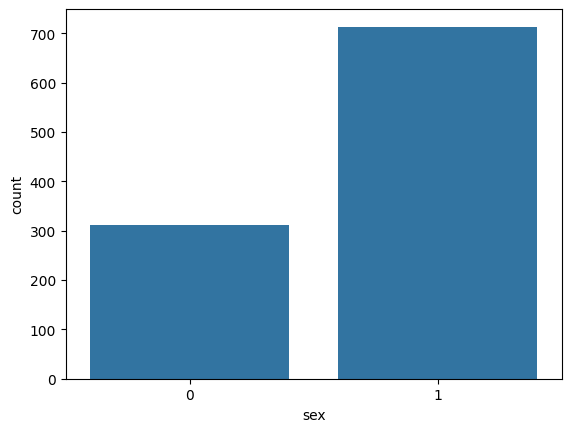

In [6]:
import seaborn as sns
sns.countplot(data = df, x = 'sex')
plt.show()

In [7]:
# data is imbalanced

<Axes: >

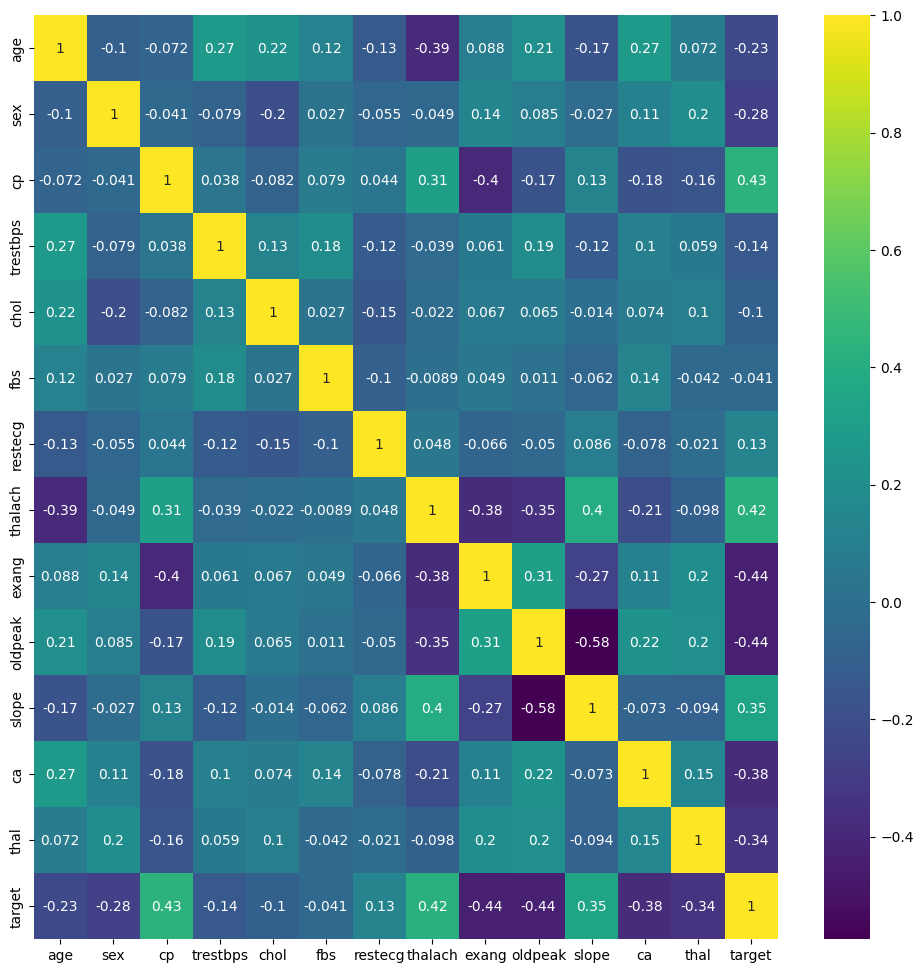

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [14]:
df.drop(columns=['exang','oldpeak'],inplace=True)

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
x = df.drop(columns=['target'])
y = df.target

In [17]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.1)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=20, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [20]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [21]:
from sklearn.metrics import accuracy_score, precision_score
def get_clfs_results(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_predict = clf.predict(x_test)
    acc = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test, y_predict)
    return acc, precision

In [22]:
accuracy = []
precision =[]
for keys, items in clfs.items():
    a,p = get_clfs_results(items,x_train,x_test,y_train,y_test)
    accuracy.append(a)
    precision.append(p)

c:\Users\Asghar Qambar Rizvi\OneDrive\Desktop\Doctor_project\DSENV\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [23]:
results = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy, 'Precision': precision}).sort_values(by='Accuracy',ascending=False)

In [24]:
results

,Algorithm,Accuracy,Precision
7,BgC,1.000000,1.000000
5,RF,1.000000,1.000000
8,ETC,1.000000,1.000000
9,GBDT,0.912621,0.927273
6,AdaBoost,0.912621,0.960784
3,DT,0.912621,0.943396
4,LR,0.883495,0.923077
2,NB,0.757282,0.792453
1,KN,0.737864,0.795918
0,SVC,0.543689,0.543689


In [25]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=2)

In [26]:
y_predict = rfc.predict(x_test)

<Axes: >

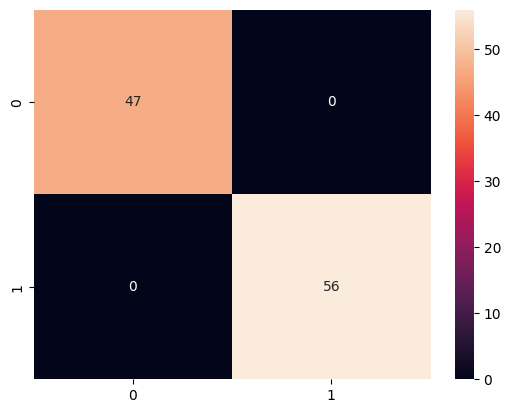

In [29]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True
)

In [30]:
import pickle
with open('../models/heart.pickle','wb') as f:
    pickle.dump(rfc,f)